In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20, 10
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 24
mpl.rcParams['lines.markersize'] = 15
mpl.rcParams['axes.grid'] = True
# mpl.rcParams.find_all('')

In [4]:
from scipy.special import gamma

In [5]:
def beta_pdf(x, alpha, beta):
    c = gamma(alpha) * gamma(beta) / gamma(alpha + beta)
    return x**(alpha-1) * (1-x)**(beta-1) / c

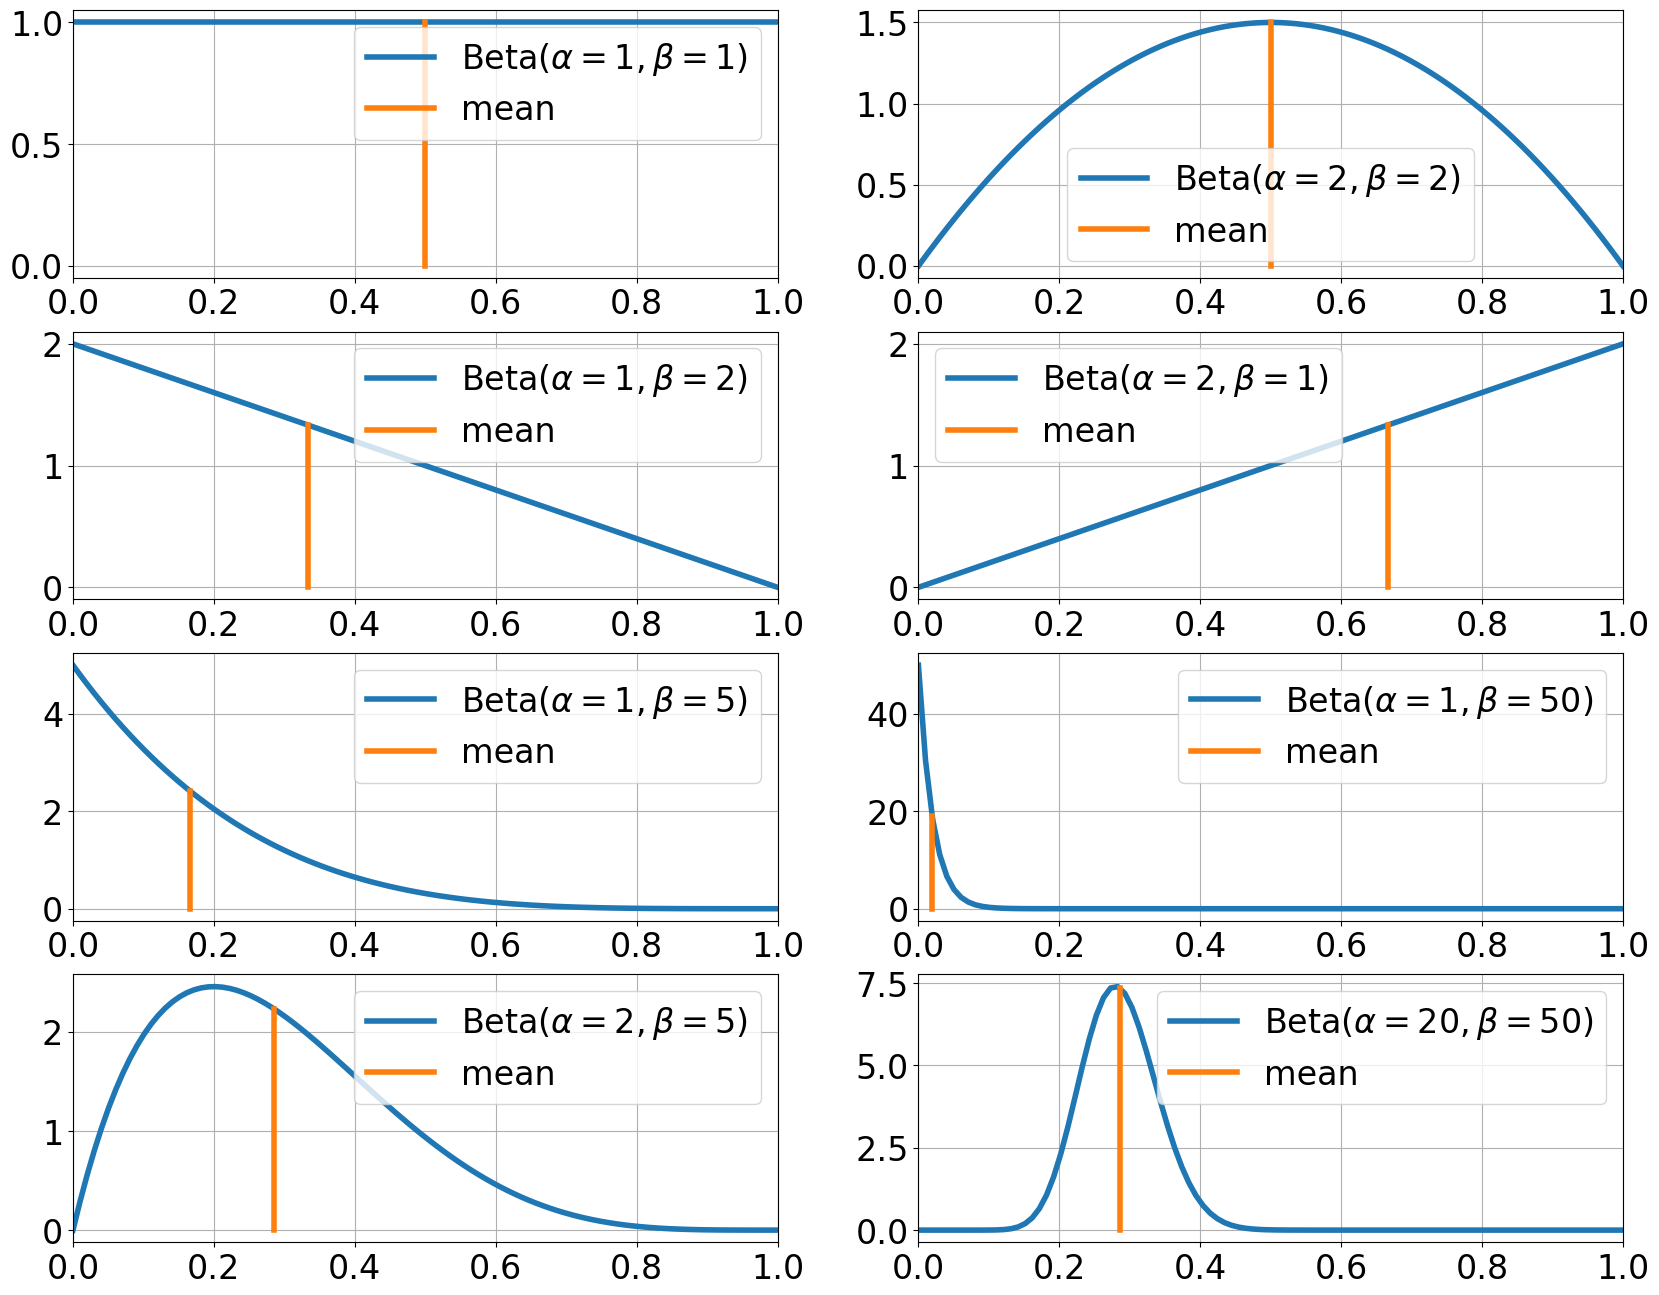

In [7]:
x = np.linspace(0, 1, 100)
param_list = [(1, 1), (2, 2), (1, 2), (2, 1), (1, 5), (1, 50), (2, 5), (20, 50)]
n_cols = 2
n_rows = 4 #<np.ceil(len(param_list) / n_cols)
plt.figure(figsize=(20, 4*n_rows))
for i, (alpha, beta) in enumerate(param_list):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(x, beta_pdf(x, alpha, beta), label='Beta$\\left(\\alpha={}, \\beta={}\\right)$'.format(alpha, beta))
    m = alpha / (alpha + beta)
    plt.plot([m] * 2, [0, beta_pdf(m, alpha, beta)], label='mean')
    plt.xlim(0, 1)
    plt.legend()

{'bodies': [<matplotlib.collections.PolyCollection at 0x11bac55b0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x11bac53d0>}

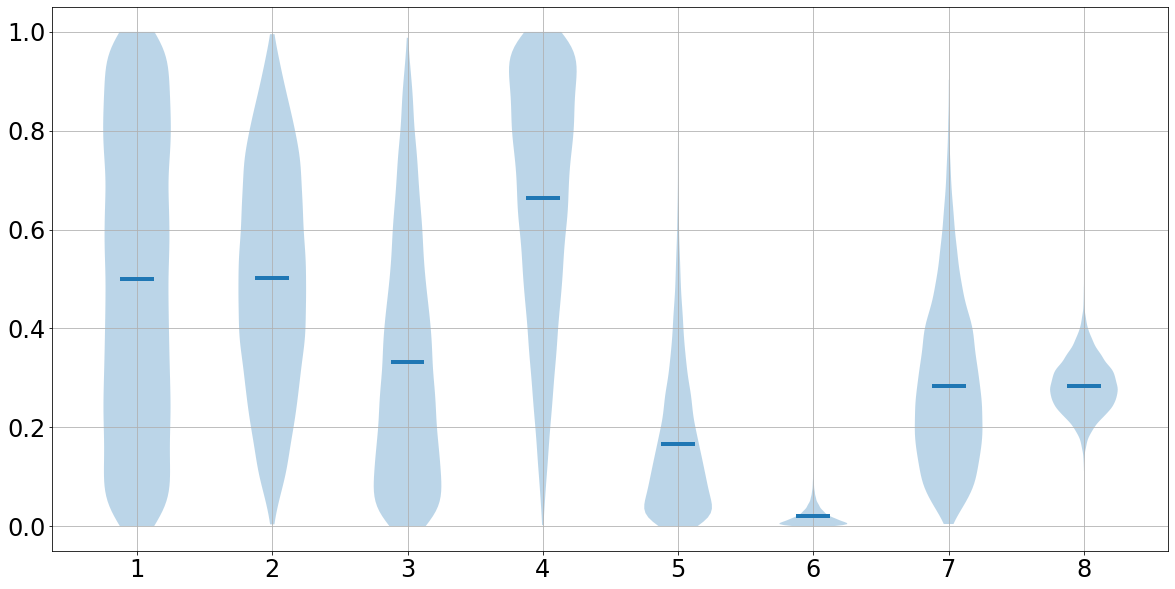

In [ ]:
x = np.linspace(0, 1, 100)
param_list = [(1, 1), (2, 2), (1, 2), (2, 1), (1, 5), (1, 50), (2, 5), (20, 50)]
n_draws = 10000
draws = np.zeros((n_draws, len(param_list)))
for i, (alpha, beta) in enumerate(param_list):
    draws[:, i] = np.random.beta(alpha, beta, n_draws)
plt.violinplot(draws, showmeans=True, showextrema=False)

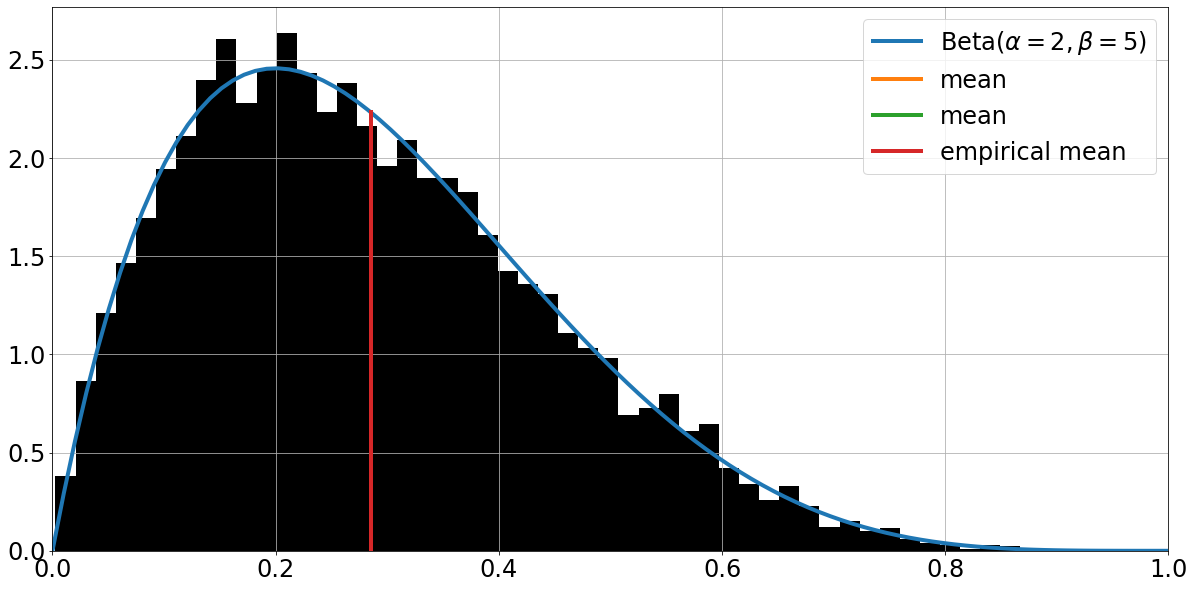

In [ ]:
# Exemple de tirage selon une loi Beta(alpha, beta)
alpha, beta = 2, 5

n_draws = 10000
draws = np.random.beta(alpha, beta, n_draws)
plt.hist(draws, bins=50, density=True, color='k')

plt.plot(x, beta_pdf(x, alpha, beta), label='Beta$\\left(\\alpha={}, \\beta={}\\right)$'.format(alpha, beta))
m = alpha / (alpha + beta)
plt.plot([m] * 2, [0, beta_pdf(m, alpha, beta)], label='mean')
m_draw = np.mean(draws)
plt.plot([m] * 2, [0, beta_pdf(m, alpha, beta)], label='mean')
plt.plot([m_draw] * 2, [0, beta_pdf(m_draw, alpha, beta)], label='empirical mean')
plt.xlim(0, 1)
plt.legend()